In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'serif',
        'serif': ['Times'],
        'weight': 'normal'}

matplotlib.rc('font', **font)
matplotlib.rcParams.update({
    "text.usetex": True,
    'font.size' : 24,
    'axes.labelsize': 24,
    'legend.fontsize': 24
})

GRAPH_PATH = "../data/graphs/"
REDSHIFT_AXIS_NAME = "$z$ (units)"
REDSHIFT_RANGE = (0, 0.36)
REDSHIFT_COLOR = "tab:red"
MAGNITUDE_AXIS_NAME = "$m_r$ (units)"
MAGNITUDE_RANGE = (12, 18)
MAGNITUDE_COLOR = "orange"
BIN_THRESHOLD = 10

def set_redshift_graph_axis(axis, y_axis_name):
    axis.set_xlabel(REDSHIFT_AXIS_NAME)
    axis.set_ylabel(y_axis_name)
    axis.set_xticks(np.arange(REDSHIFT_RANGE[0], REDSHIFT_RANGE[1], step=0.1))
    axis.set_xlim(REDSHIFT_RANGE[0], REDSHIFT_RANGE[1])
    axis.grid(visible=True)

def set_magnitude_graph_axis(axis, y_axis_name):
    axis.set_xlabel(MAGNITUDE_AXIS_NAME)
    axis.set_ylabel(y_axis_name)
    axis.set_xticks(np.arange(MAGNITUDE_RANGE[0], MAGNITUDE_RANGE[1], step=1))
    axis.set_xlim(MAGNITUDE_RANGE[0], MAGNITUDE_RANGE[1])
    axis.grid(visible=True)

redshift_data = pd.read_csv("../data/GalaxyPhotometricData.csv")
redshift_data["CorrectedPetroMag"] = redshift_data["petroMag_r"] - redshift_data["extinction_r"]

original_training_galaxies = pd.read_csv("../data/training_galaxy_data.csv")
original_training_galaxies = redshift_data[redshift_data["Id"].isin(original_training_galaxies["Id"])]

original_validation_galaxies = pd.read_csv("../data/validation_galaxy_data.csv")
original_validation_galaxies = redshift_data[redshift_data["Id"].isin(original_validation_galaxies["Id"])]

original_test_galaxies = pd.read_csv("../data/test_galaxy_data.csv")
original_test_galaxies = redshift_data[redshift_data["Id"].isin(original_test_galaxies["Id"])]

predictions_validation = pd.read_csv("../data/predictions_ensemble_validation.csv").sort_values(by="Id")
predictions_test = pd.read_csv("../data/predictions_ensemble_test.csv").sort_values(by="Id")
all_predictions = pd.concat([predictions_validation, predictions_test])

all_predictions["PredictedClass"] = np.where(all_predictions["Prediction"] == 0, ["Spiral"], ["Elliptical"])
all_predictions_with_data = pd.merge(all_predictions, redshift_data, on="Id")

incorrect_predictions = all_predictions_with_data[all_predictions_with_data["PredictedClass"] != all_predictions_with_data["Class"]].reset_index()
incorrect_predictions


,index,Unnamed: 0,Id,Prediction,PredictedClass,Class_gz1,Class_gz2,Class,InitialDataset,z,zConf,zErr,petroMag_r,extinction_r,CorrectedPetroMag
0,10,10293,587722981743263813,1,Elliptical,NaN,Spiral,Spiral,GZ2,0.115384,0.999864,0.000155,16.79422,0.066997,16.727223
1,14,10541,587722981747458177,0,Spiral,NaN,Elliptical,Elliptical,GZ2,0.085189,0.936401,0.000100,16.68089,0.055114,16.625776
2,37,14479,587722982278955123,0,Spiral,NaN,Elliptical,Elliptical,GZ2,0.158464,0.999572,0.000168,16.93004,0.088846,16.841194
3,46,16666,587722982284460240,1,Elliptical,NaN,Spiral,Spiral,GZ2,0.188364,0.998507,0.000184,16.50113,0.066976,16.434154
4,80,11301,587722982298485037,1,Elliptical,NaN,Spiral,Spiral,GZ2,0.117303,0.999658,0.000171,17.13384,0.185629,16.948211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,62598,9895,588848900448649295,1,Elliptical,NaN,Spiral,Spiral,GZ2,0.081769,0.999826,0.000150,16.18168,0.054855,16.126825
2690,62665,16495,588848900972544227,0,Spiral,NaN,Elliptical,Elliptical,GZ2,0.020795,0.991480,0.000081,16.91601,0.149539,16.766471
2691,62675,23594,588848900977983752,1,Elliptical,NaN,Spiral,Spiral,GZ2,0.124789,0.999831,0.000155,16.66551,0.134128,16.531382
2692,62682,25522,588848900980605088,0,Spiral,NaN,Elliptical,Elliptical,GZ2,0.124776,0.999699,0.000160,16.56852,0.107437,16.461083


# Overall distribution of the splits

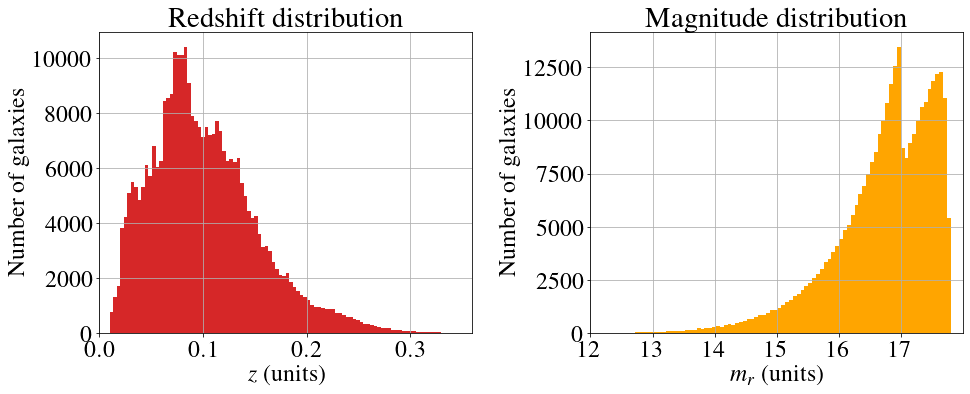

In [107]:
f, axarr = plt.subplots(1, 2)
f.set_figwidth(14)
f.set_figheight(6)

redshift_data["z"].hist(bins=100, color = REDSHIFT_COLOR, ax = axarr[0])
set_redshift_graph_axis(axarr[0], "Number of galaxies")
axarr[0].set_title("Redshift distribution")

redshift_data["CorrectedPetroMag"].hist(bins=100, color = MAGNITUDE_COLOR, ax=axarr[1])
set_magnitude_graph_axis(axarr[1], "Number of galaxies")
axarr[1].set_title("Magnitude distribution")
plt.tight_layout()
plt.savefig(GRAPH_PATH + "redshift_and_magnitude_distribution.pdf")

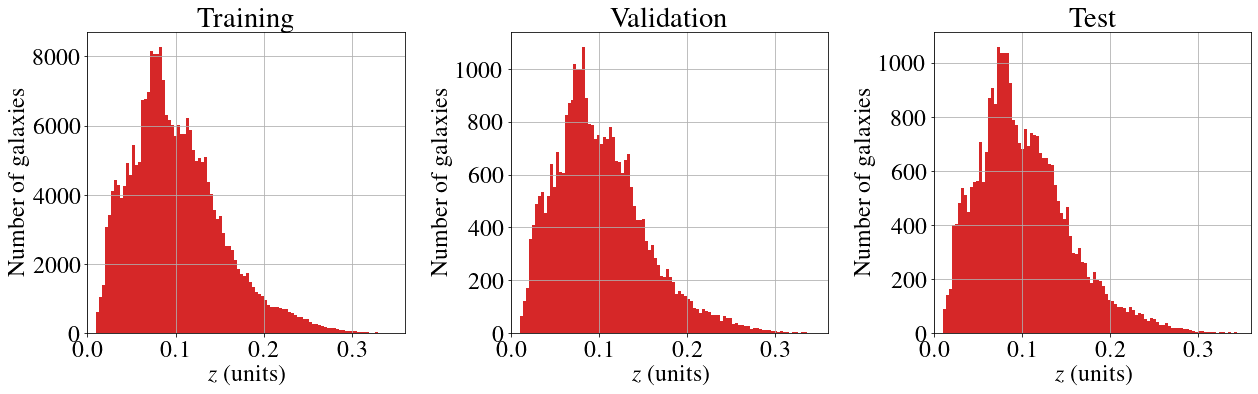

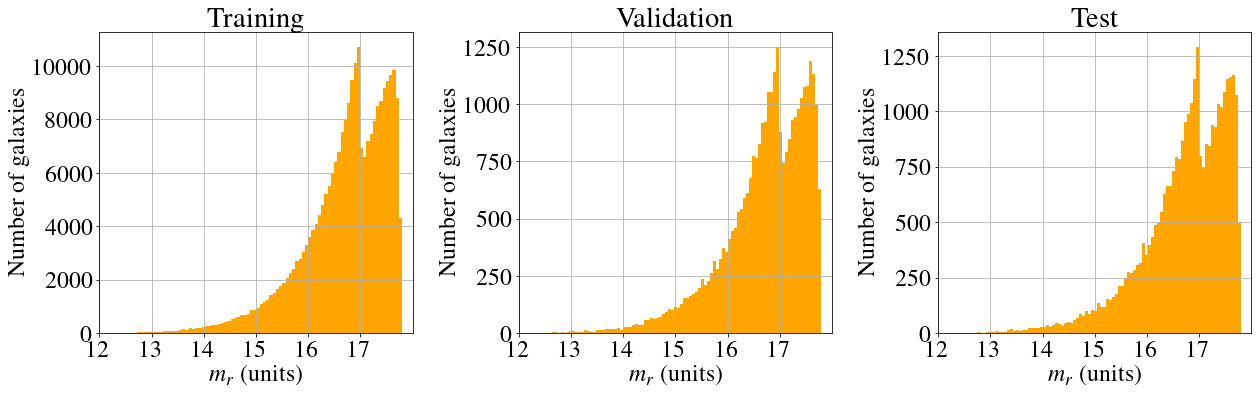

In [108]:
def draw_distribution(column_name, file_name, color):
    fig, axarr = plt.subplots(1, 3)

    fig.set_figwidth(18)
    fig.set_figheight(6)
    axarr[0].hist(original_training_galaxies[column_name], bins=100, color=color)
    axarr[0].set_title("Training")
    if(column_name == "z"):
        set_redshift_graph_axis(axarr[0], "Number of galaxies")
    else:
        set_magnitude_graph_axis(axarr[0], "Number of galaxies")
    # plt.savefig("../data/Redshift_distribution.png")

    axarr[1].hist(original_validation_galaxies[column_name], bins=100, color=color)
    axarr[1].set_title("Validation")
    if(column_name == "z"):
        set_redshift_graph_axis(axarr[1], "Number of galaxies")
    else:
        set_magnitude_graph_axis(axarr[1], "Number of galaxies")

    axarr[2].hist(original_test_galaxies[column_name], bins=100, color=color)
    axarr[2].set_title("Test")
    if(column_name == "z"):
        set_redshift_graph_axis(axarr[2], "Number of galaxies")
    else:
        set_magnitude_graph_axis(axarr[2], "Number of galaxies")

    fig.tight_layout()
    fig.savefig(file_name)

draw_distribution("z",  GRAPH_PATH + "redshift_distribution_splits.pdf", REDSHIFT_COLOR)
draw_distribution("CorrectedPetroMag", GRAPH_PATH + "magnitude_distribution_splits.pdf", MAGNITUDE_COLOR)

# Intersecting failed galaxies

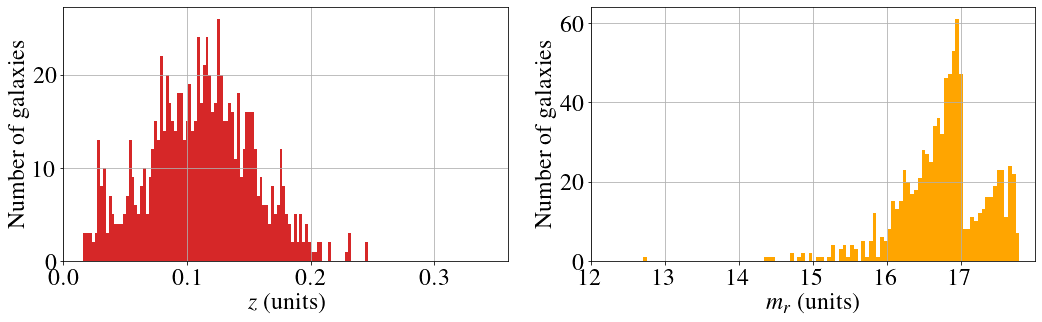

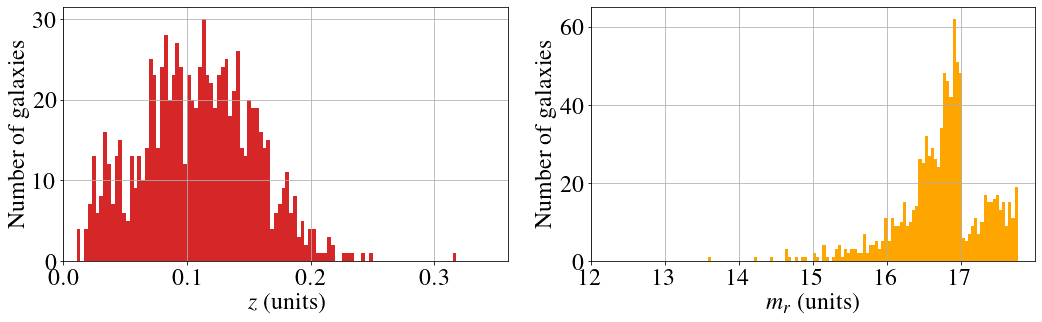

In [109]:
def plot_intersecting_galaxies(split):
    fg_d = pd.read_csv(f"../data/failed_galaxies_Dieleman_{split}.csv")
    fg_c = pd.read_csv(f"../data/failed_galaxies_Cavanagh_{split}.csv")
    fg_i = pd.read_csv(f"../data/failed_galaxies_ResNet50_{split}.csv")

    in1 = np.intersect1d(fg_d["Id"], fg_c["Id"])
    in2 = np.intersect1d(in1, fg_i["Id"])

    intersecting_galaxies_with_data = redshift_data[redshift_data["Id"].isin(in2)]

    f, axarr = plt.subplots(1, 2)
    f.set_figwidth(15)
    f.set_figheight(5)

    intersecting_galaxies_with_data["z"].hist(bins=100, ax=axarr[0], color = REDSHIFT_COLOR)
    set_redshift_graph_axis(axarr[0], "Number of galaxies")

    intersecting_galaxies_with_data["CorrectedPetroMag"].hist(bins=100, ax=axarr[1], color = MAGNITUDE_COLOR)
    set_magnitude_graph_axis(axarr[1], "Number of galaxies")

    plt.tight_layout()
    f.savefig(GRAPH_PATH + f"intersecting_failed_galaxy_distribution_{split}.pdf")

plot_intersecting_galaxies("validation")
plot_intersecting_galaxies("test")

# Ensemble model data analysis

2690


<ipython-input-110-640c9e9c97cb>:12: RuntimeWarning: invalid value encountered in true_divide
  relative_values = failed_values / original_values


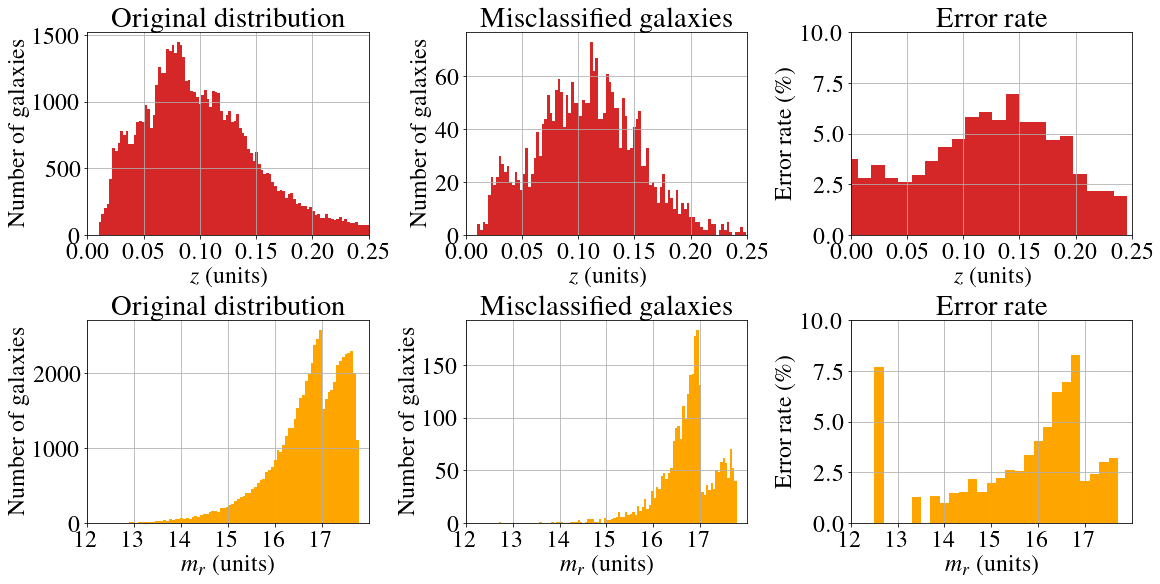

In [110]:
def get_historgram_data(original_galaxies, failed_galaxies, column, range, bins):
    # failed_galaxies_iqr = failed_galaxies[column].quantile(0.75) - failed_galaxies[column].quantile(0.25)
    # failed_galaxies_bin_width = 2 * failed_galaxies_iqr / np.power(len(failed_galaxies[column]), 1/3)
    # failed_galaxies_bins = int(((failed_galaxies[column].max() - failed_galaxies[column].min()) / failed_galaxies_bin_width) + 1)
    failed_galaxies_bins = bins

    original_values, original_ranges = np.histogram(original_galaxies[column], bins=failed_galaxies_bins, range=range)
    failed_values, failed_ranges = np.histogram(failed_galaxies[column],  bins=failed_galaxies_bins, range=range)
    
    failed_values = np.where(original_values > BIN_THRESHOLD, failed_values, np.zeros(failed_values.shape))

    relative_values = failed_values / original_values
    return (relative_values, failed_ranges[0: -1])

def plot_normalised_hist(axis, original_galaxies, failed_galaxies, column, metric, range, color):
    values, ranges = get_historgram_data(original_galaxies, failed_galaxies, column, range, 30)

    axis.bar(ranges, values * 100, width = ranges[1] - ranges[0], color = color)
    axis.set_title("Error rate")
    axis.set_ylim(0, 10)
    if(metric == "Redshift"):
        set_redshift_graph_axis(axis, "Error rate (\%)")
    else:
        set_magnitude_graph_axis(axis, "Error rate (\%)")

def plot_split(failed_galaxies, original_galaxies):

    f, axarr = plt.subplots(2, 3, figsize = (16, 8), constrained_layout=True)

    failed_galaxies_with_data = redshift_data[redshift_data["Id"].isin(failed_galaxies["Id"])]
    failed_galaxies_with_data = failed_galaxies_with_data[failed_galaxies_with_data["z"] < 0.25]
    print(len(failed_galaxies_with_data))
    # Redshift
    original_galaxies["z"].hist(bins=100, ax=axarr[0][0], color = REDSHIFT_COLOR)
    set_redshift_graph_axis(axarr[0][0], "Number of galaxies")
    axarr[0][0].set_xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
    axarr[0][0].set_xlim((0, 0.25))
    axarr[0][0].set_title("Original distribution")

    failed_galaxies_with_data["z"].hist(bins=100, ax=axarr[0][1], color = REDSHIFT_COLOR)
    axarr[0][1].set_title("Misclassified galaxies")
    set_redshift_graph_axis(axarr[0][1], "Number of galaxies")
    axarr[0][1].set_xlim((0, 0.25))
    axarr[0][1].set_xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])

    plot_normalised_hist(axarr[0][2], original_galaxies, failed_galaxies_with_data, "z", "Redshift", (REDSHIFT_RANGE[0], REDSHIFT_RANGE[1]), REDSHIFT_COLOR)
    axarr[0][2].set_xlim((0, 0.25))
    axarr[0][2].set_xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])

    # Magnitude
    original_galaxies["CorrectedPetroMag"].hist(bins=100, ax=axarr[1][0], color = MAGNITUDE_COLOR)
    axarr[1][0].set_title("Original distribution")
    set_magnitude_graph_axis(axarr[1][0], "Number of galaxies")

    failed_galaxies_with_data["CorrectedPetroMag"].hist(bins=100, ax=axarr[1][1], color = MAGNITUDE_COLOR)
    axarr[1][1].set_title("Misclassified galaxies")
    set_magnitude_graph_axis(axarr[1][1], "Number of galaxies")

    plot_normalised_hist(axarr[1][2], original_galaxies, failed_galaxies_with_data, "CorrectedPetroMag", "Magnitude", (MAGNITUDE_RANGE[0], MAGNITUDE_RANGE[1]), MAGNITUDE_COLOR)

    f.savefig(GRAPH_PATH + "failed_galaxies_ensemble.pdf")

plot_split(
    incorrect_predictions[incorrect_predictions["z"] < 0.25],
    all_predictions_with_data[all_predictions_with_data["z"] < 0.25])


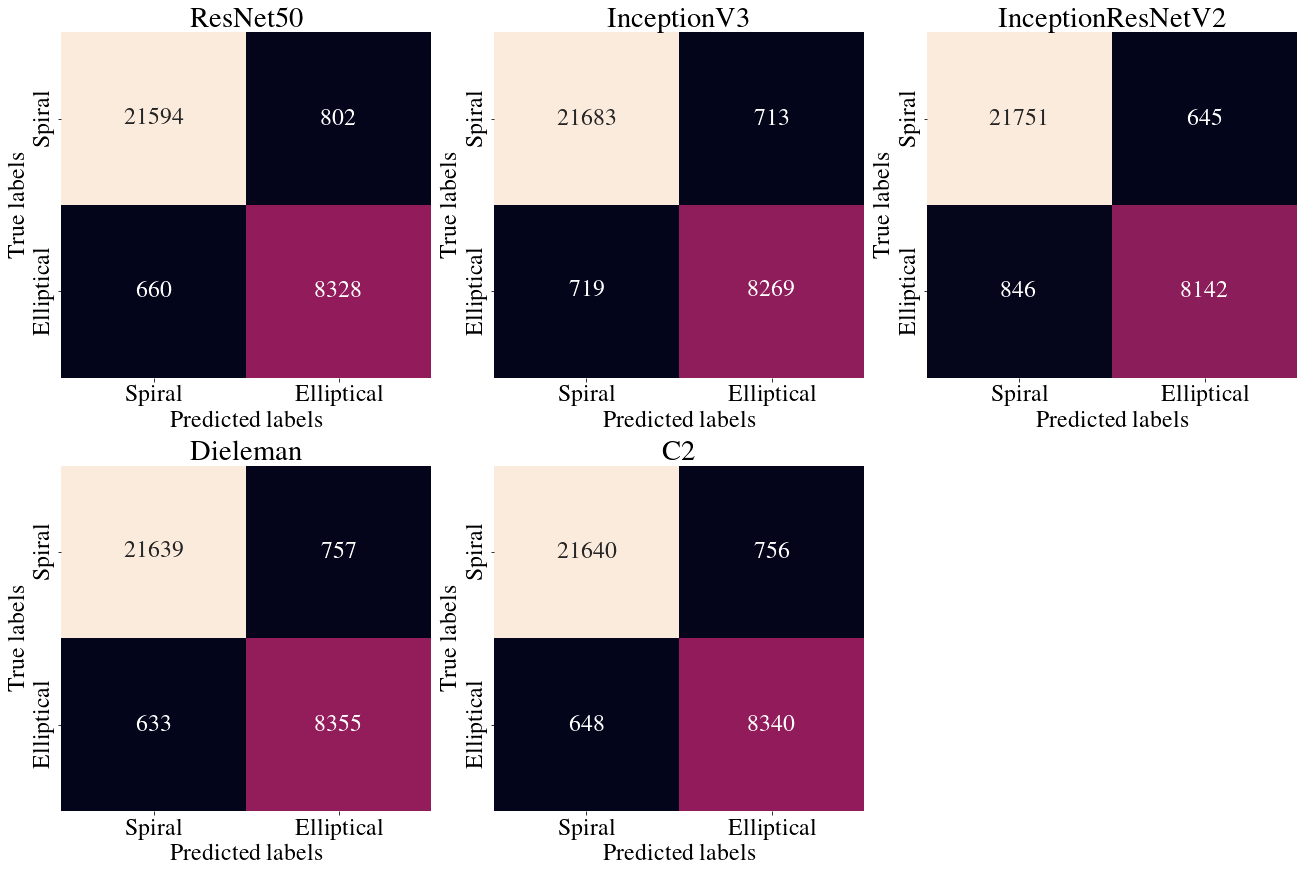

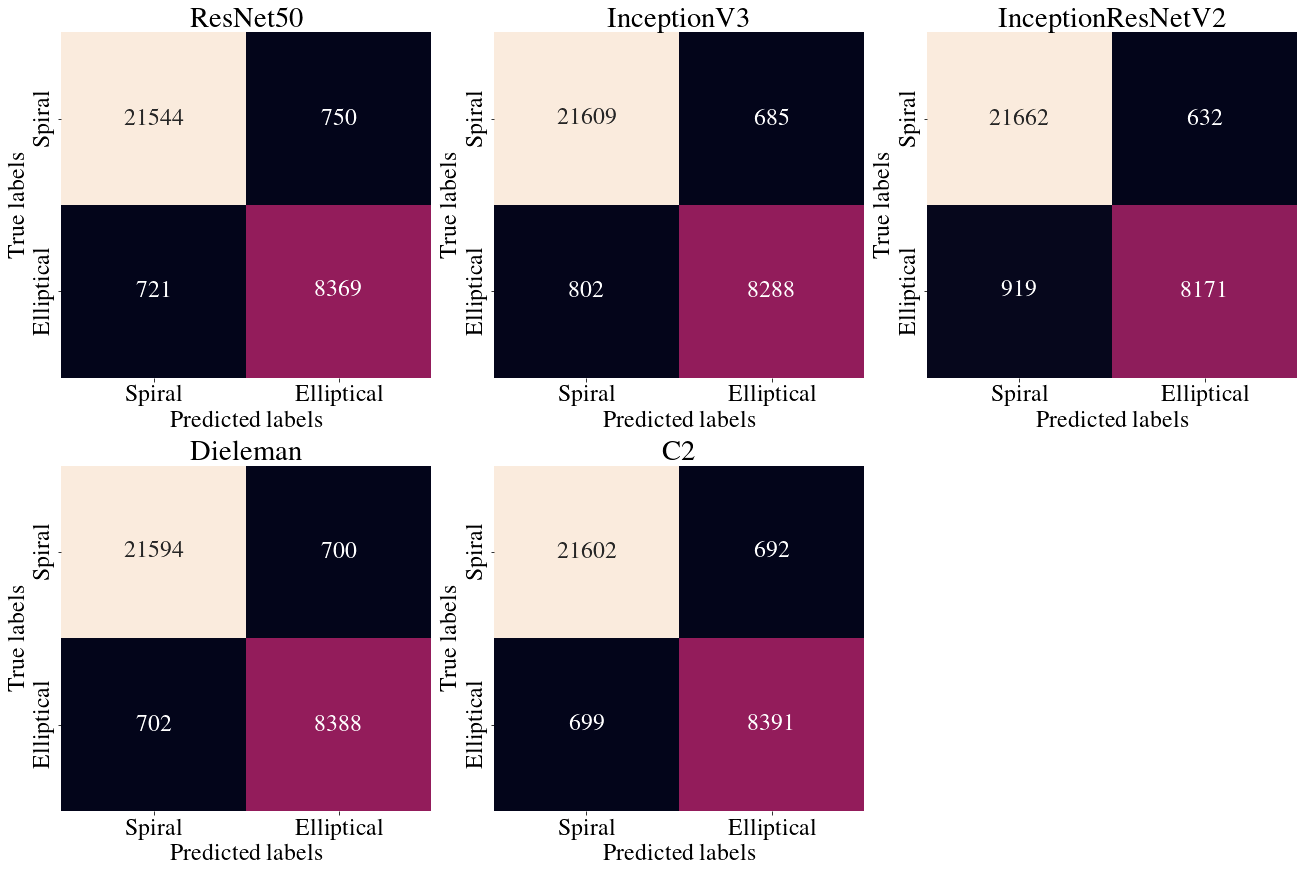

In [128]:
import seaborn as sn
import pandas as pd

matrices = [    
    {
        "model": "ResNet50",
        "validation": [[21594, 802], [660, 8328]],
        "test": [[21544, 750], [721, 8369]]
    },
    {
        "model": "InceptionV3",
        "validation": [[21683, 713], [719, 8269]],
        "test": [[21609, 685], [802, 8288]]
    },
    {
        "model": "InceptionResNetV2",
        "validation": [[21751, 645], [846, 8142]],
        "test": [[21662, 632], [919, 8171]]
    },
    {
        "model": "Dieleman",
        "validation": [[21639, 757], [633, 8355]],
        "test": [[21594, 700], [702, 8388]]
    },
    {
        "model": "C2",
        "validation": [[21640, 756], [648, 8340]],
        "test": [[21602, 692], [699, 8391]]
    },
]


def plot_matrices(split):
  f, axarr = plt.subplots(2, 3, constrained_layout=True)

  f.set_figwidth(18)
  f.set_figheight(12)

#   f.suptitle(f"{split.capitalize()} split")

  for i, obj in enumerate(matrices):
    df = pd.DataFrame(np.array(obj[split]), index = ['Spiral', 'Elliptical'], columns = ['Spiral', 'Elliptical'])
    sn.heatmap(df, annot=True, fmt='g', cbar=False, ax=axarr[i // 3][i % 3])
    axarr[i // 3][i % 3].set_ylabel("True labels")
    axarr[i // 3][i % 3].set_xlabel("Predicted labels")
    axarr[i // 3][i % 3].set_title(obj["model"])

  axarr[-1, -1].axis('off')
  # f.tight_layout()
  f.savefig(GRAPH_PATH + f"confusion_matrix_{split}.pdf")

plot_matrices("validation")
plot_matrices("test")

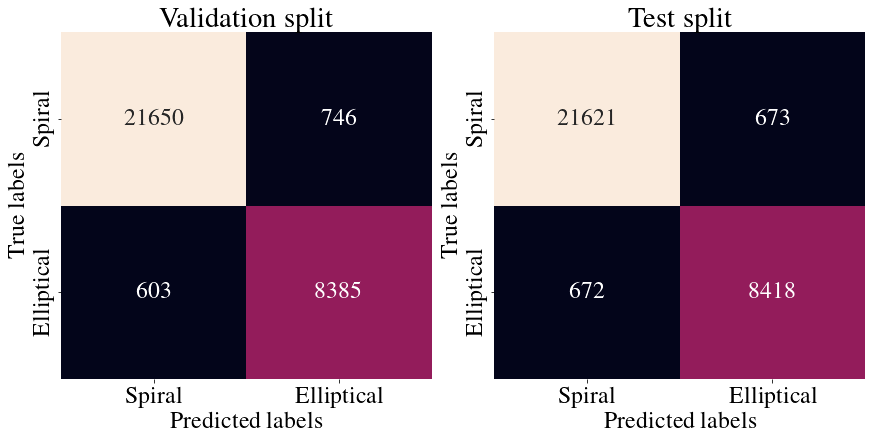

In [129]:
matrices = [    
    {
        "model": "Validation split",
        "matrix": [[21650, 746], [603, 8385]]
    },
    {
        "model": "Test split",
        "matrix": [[21621, 673], [672, 8418]]
    },
]
f, axarr = plt.subplots(1, 2, constrained_layout=True)

f.set_figwidth(12)
f.set_figheight(6)

for i, obj in enumerate(matrices):
  df = pd.DataFrame(np.array(obj["matrix"]), index = ['Spiral', 'Elliptical'], columns = ['Spiral', 'Elliptical'])
  sn.heatmap(df, annot=True, fmt='g', cbar=False, ax=axarr[i])
  axarr[i].set_ylabel("True labels")
  axarr[i].set_xlabel("Predicted labels")
  axarr[i].set_title(obj["model"])


# f.tight_layout()
# plt.show()
f.savefig(GRAPH_PATH + "confusion_matrix_ensemble.pdf")

<ipython-input-110-640c9e9c97cb>:12: RuntimeWarning: invalid value encountered in true_divide
  relative_values = failed_values / original_values
<ipython-input-110-640c9e9c97cb>:12: RuntimeWarning: invalid value encountered in true_divide
  relative_values = failed_values / original_values
<ipython-input-110-640c9e9c97cb>:12: RuntimeWarning: invalid value encountered in true_divide
  relative_values = failed_values / original_values
<ipython-input-110-640c9e9c97cb>:12: RuntimeWarning: invalid value encountered in true_divide
  relative_values = failed_values / original_values


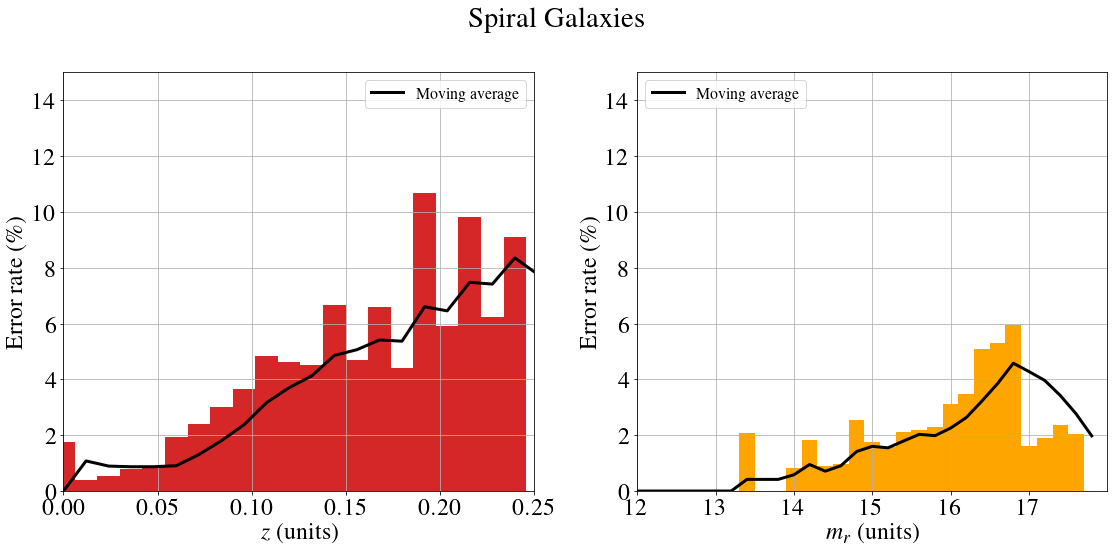

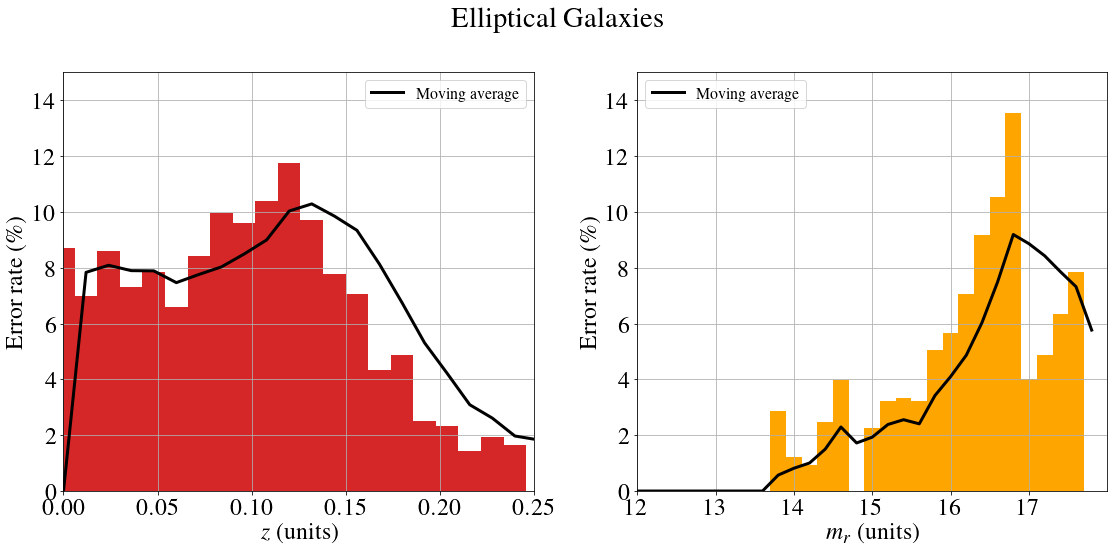

In [160]:
def draw_moving_average(axis, values, ranges):
    axis.plot(ranges, pd.DataFrame(values * 100).rolling(window=5, min_periods=2).mean().fillna(0), color='black', linewidth=3)
    axis.legend([ "Moving average"], prop={'size': 16})

def plot_error_rate_distribution_for_class(
    class_name,
    original_galaxies,
    failed_galaxies,
    bins,
    image_name,
    previous_original_galaxies = None,
    previous_failed_galaxies = None):
    f, axarr = plt.subplots(1, 2)
    f.set_figwidth(16)
    f.set_figheight(8)

    f.suptitle(f"{class_name} Galaxies")

    if(not previous_original_galaxies is None and  not previous_failed_galaxies is None):
        values, ranges = get_historgram_data(
            previous_original_galaxies[previous_original_galaxies["Class"] == class_name],
            previous_failed_galaxies[previous_failed_galaxies["Class"] == class_name],
            "z",
            (REDSHIFT_RANGE[0], REDSHIFT_RANGE[1]),
            bins)

        axarr[0].bar(ranges, values * 100, ranges[1] - ranges[0], color ="pink")

    values, ranges = get_historgram_data(
        original_galaxies[original_galaxies["Class"] == class_name],
        failed_galaxies[failed_galaxies["Class"] == class_name],
        "z",
        (REDSHIFT_RANGE[0], REDSHIFT_RANGE[1]),
        bins)

    axarr[0].bar(ranges, values * 100, ranges[1] - ranges[0], color =REDSHIFT_COLOR)
    draw_moving_average(axarr[0], values, ranges)

    set_redshift_graph_axis(axarr[0], "Error rate (\%)")
    axarr[0].set_xlim((0, 0.25))
    axarr[0].set_ylim((0, 15))
    axarr[0].set_xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])

    if(not previous_original_galaxies is None and  not previous_failed_galaxies is None):
        axarr[0].legend([ "Moving average", "Original Error Rate", "New Error Rate"], prop={'size': 16})

    
    # magnitude
    if(not previous_original_galaxies is None and  not previous_failed_galaxies is None):
        values, ranges = get_historgram_data(
            previous_original_galaxies[previous_original_galaxies["Class"] == class_name],
            previous_failed_galaxies[previous_failed_galaxies["Class"] == class_name],
            "CorrectedPetroMag",
            (MAGNITUDE_RANGE[0], MAGNITUDE_RANGE[1]),
            bins)

        axarr[1].bar(ranges, values * 100, ranges[1] - ranges[0], color = "navajowhite")

    
    values, ranges = get_historgram_data(
        original_galaxies[original_galaxies["Class"] == class_name],
        failed_galaxies[failed_galaxies["Class"] == class_name],
        "CorrectedPetroMag",
        (MAGNITUDE_RANGE[0], MAGNITUDE_RANGE[1]),
        bins)

    axarr[1].bar(ranges, values * 100, ranges[1] - ranges[0], color = MAGNITUDE_COLOR)
    draw_moving_average(axarr[1], values, ranges)
    set_magnitude_graph_axis(axarr[1], "Error rate (\%)")
    axarr[1].set_ylim((0, 15))

    if(not previous_original_galaxies is None and  not previous_failed_galaxies is None):
        axarr[1].legend([ "Moving average", "Original Error Rate", "New Error Rate"], prop={'size': 16})


    plt.tight_layout()
    plt.savefig(GRAPH_PATH + image_name)

bins = 30
plot_error_rate_distribution_for_class(
    "Spiral",
    all_predictions_with_data[all_predictions_with_data["z"] < 0.25],
    incorrect_predictions[incorrect_predictions["z"] < 0.25],
    bins,
    "distributions_by_galaxies_Spiral.pdf")
plot_error_rate_distribution_for_class(
    "Elliptical",
    all_predictions_with_data[all_predictions_with_data["z"] < 0.25],
    incorrect_predictions[incorrect_predictions["z"] < 0.25],
    bins,
    "distributions_by_galaxies_Elliptical.pdf")

# Anomalies

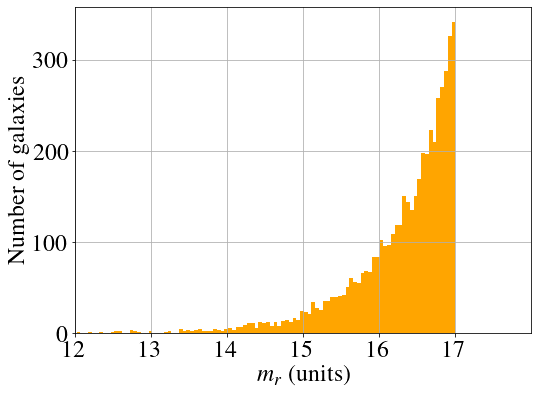

In [112]:
original_classes = pd.read_csv("../data/gz2_hart16.csv")
original_anomalies = original_classes[original_classes["gz2_class"].str.contains("\(")]
all_anomalies = all_predictions_with_data[all_predictions_with_data["Id"].isin(original_anomalies["dr7objid"])]

f, axarr = plt.subplots(1, 1)
f.set_figwidth(8)
f.set_figheight(6)

all_anomalies["CorrectedPetroMag"].hist(bins= 100, ax =axarr, color=MAGNITUDE_COLOR)
set_magnitude_graph_axis(axarr, "Number of galaxies")
f.tight_layout()
f.savefig(GRAPH_PATH + "galaxies_with_anomalies.pdf")


<ipython-input-110-640c9e9c97cb>:12: RuntimeWarning: invalid value encountered in true_divide
  relative_values = failed_values / original_values
<ipython-input-110-640c9e9c97cb>:12: RuntimeWarning: invalid value encountered in true_divide
  relative_values = failed_values / original_values
<ipython-input-110-640c9e9c97cb>:12: RuntimeWarning: invalid value encountered in true_divide
  relative_values = failed_values / original_values
<ipython-input-110-640c9e9c97cb>:12: RuntimeWarning: invalid value encountered in true_divide
  relative_values = failed_values / original_values


2694

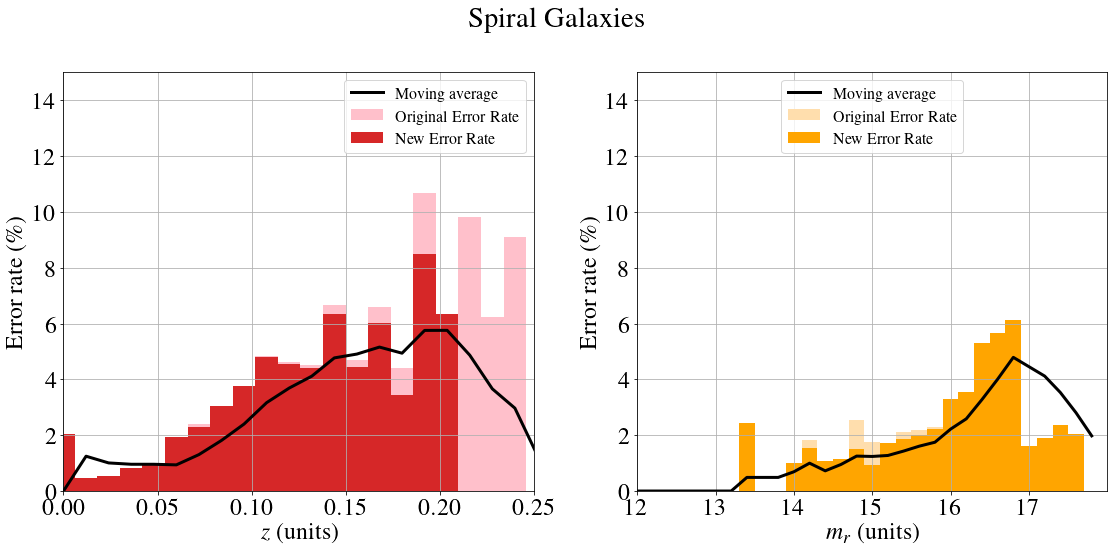

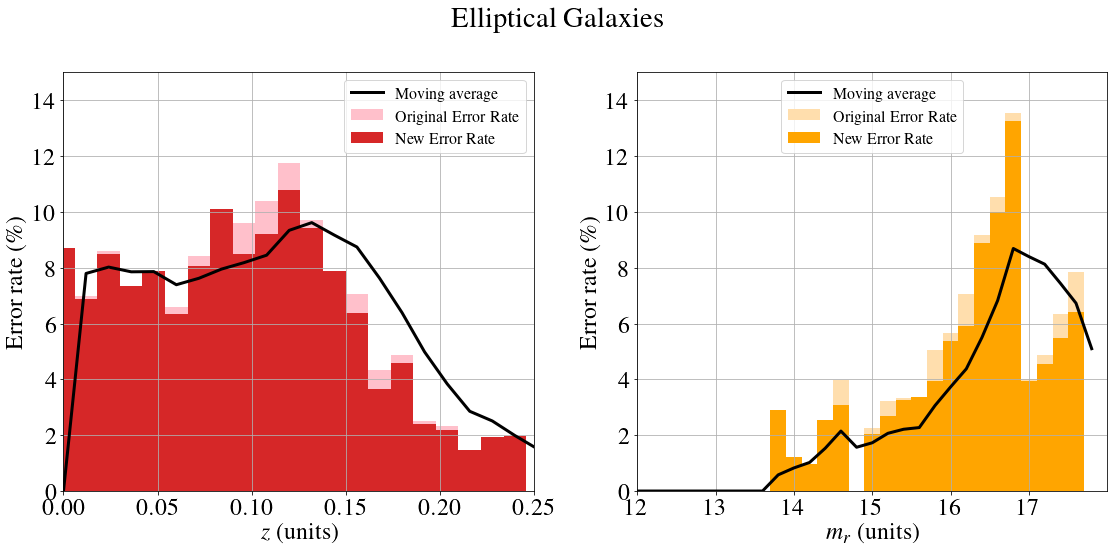

In [150]:
bins = 30
plot_error_rate_distribution_for_class(
    "Spiral",
    all_predictions_with_data[~all_predictions_with_data["Id"].isin(all_anomalies["Id"])],
    incorrect_predictions[~incorrect_predictions["Id"].isin(all_anomalies["Id"])],
    bins,
    "failed_galaxies_no_anomalies_Spiral.pdf",
    all_predictions_with_data[all_predictions_with_data["z"] < 0.25],
    incorrect_predictions[incorrect_predictions["z"] < 0.25])

plot_error_rate_distribution_for_class(
    "Elliptical",
    all_predictions_with_data[~all_predictions_with_data["Id"].isin(all_anomalies["Id"])],
    incorrect_predictions[~incorrect_predictions["Id"].isin(all_anomalies["Id"])],
    bins,
    "failed_galaxies_no_anomalies_Elliptical.pdf",
    all_predictions_with_data[all_predictions_with_data["z"] < 0.25],
    incorrect_predictions[incorrect_predictions["z"] < 0.25])

len(incorrect_predictions)

2434


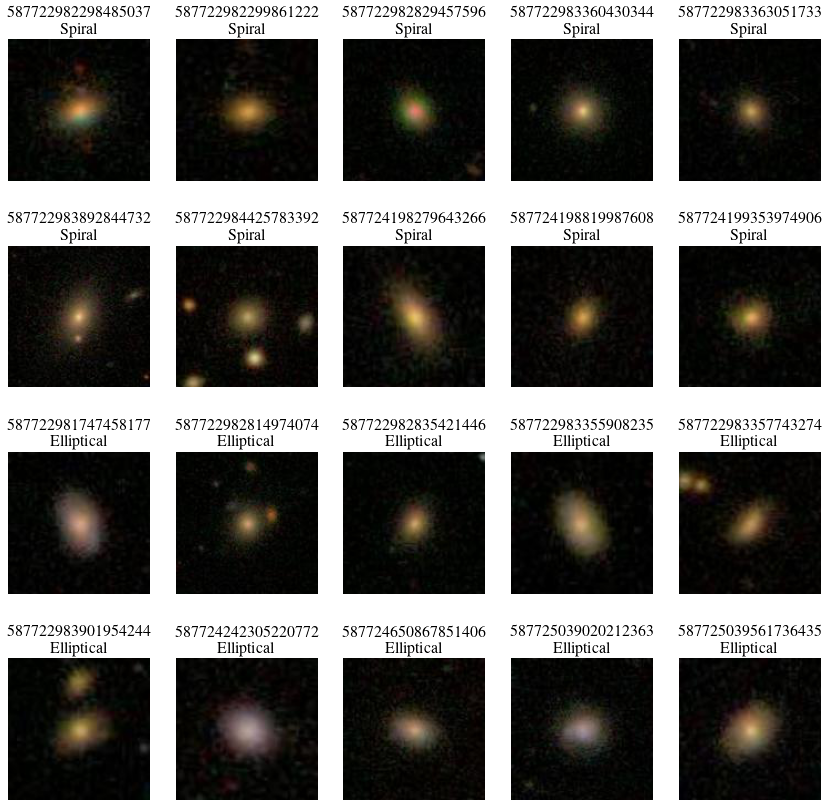

In [121]:
from PIL import Image

incorrect_predictions_no_anomalies = incorrect_predictions[~incorrect_predictions["Id"].isin(all_anomalies["Id"])]
print(len(incorrect_predictions_no_anomalies))

f, axarr = plt.subplots(4, 5)
f.set_figwidth(12)
f.set_figheight(12)

spiral_sample = incorrect_predictions_no_anomalies[incorrect_predictions_no_anomalies["Class"]  == "Spiral"].head(10)
elliptical_sample = incorrect_predictions_no_anomalies[incorrect_predictions_no_anomalies["Class"]  == "Elliptical"].head(10)

for i, (_, galaxy) in enumerate(spiral_sample.iterrows()):
    image = Image.open("../data/resized_images/" + str(galaxy["Id"]) + ".jpg")
    axarr[i // 5][i % 5].imshow(image)
    axarr[i // 5][i % 5].axis('off')
    axarr[i // 5][i % 5].set_title(str(galaxy["Id"]) + "\n" + galaxy["Class"], size=16)

for i, (_, galaxy) in enumerate(elliptical_sample.iterrows()):
    image = Image.open("../data/resized_images/" + str(galaxy["Id"]) + ".jpg")
    axarr[i // 5 + 2][i % 5].imshow(image)
    axarr[i // 5 + 2][i % 5].axis('off')
    axarr[i // 5 + 2][i % 5].set_title(str(galaxy["Id"]) + "\n" + galaxy["Class"], size=16)

plt.tight_layout()
plt.savefig(GRAPH_PATH + "failed_galaxy_sample.pdf")

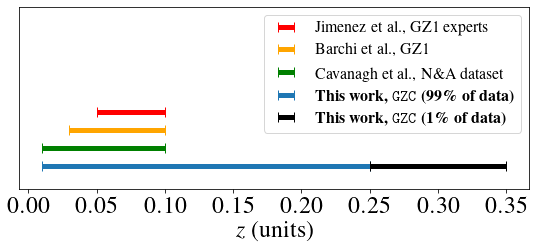

In [114]:
plt.figure(figsize=(8, 4))
plt.errorbar([(0.05 + 0.1) / 2], [1.012], capsize=5, xerr=[(0.1 - 0.05) / 2],  linewidth=5, fmt='none', color="red", label="Jimenez et al., GZ1 experts")
plt.errorbar([(0.03 + 0.1) / 2], [1.008], capsize=5, xerr=[(0.1 - 0.03) / 2],  linewidth=5, fmt='none', color="orange", label="Barchi et al., GZ1")
plt.errorbar([(0.01 + 0.1) / 2], [1.004], capsize=5, xerr=[(0.1 - 0.01) / 2],  linewidth=5, fmt='none', color="green", label="Cavanagh et al., N\&A dataset")
plt.errorbar([(0.01 + 0.25) / 2], [1.0], capsize=5, xerr=[(0.25 - 0.01) / 2], linewidth=5,  fmt='none', label="\\textbf{This work, \\texttt{GZC} (99\% of data)}")
plt.errorbar([(0.25 + 0.35) / 2], [1.0], capsize=5, xerr=[(0.35 - 0.25) / 2], linewidth=5,  fmt='none', color="black", label="\\textbf{This work, \\texttt{GZC} (1\% of data)}")
plt.xlabel(REDSHIFT_AXIS_NAME)
plt.ylim((0.995, 1.035))
plt.yticks([])
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35])
plt.tight_layout()
plt.legend(prop={"size":16})
plt.savefig(GRAPH_PATH + "redshift_comparison.pdf")

In [130]:
def get_correct_predictions(dataset):
    correct_predictions = dataset[dataset["PredictedClass"] == dataset["Class"]]
    return len(correct_predictions) / len(dataset)


print(get_correct_predictions(all_predictions_with_data[all_predictions_with_data["z"].between(0, 0.1)]))
print(get_correct_predictions(all_predictions_with_data[all_predictions_with_data["z"].between(0.1, 0.25)]))
print(get_correct_predictions(all_predictions_with_data[all_predictions_with_data["z"].between(0.25, 0.35)]))

# Q1 = predictions_with_data["z"].quantile(0.25)
# Q3 = predictions_with_data["z"].quantile(0.75)
# IQR = Q3 - Q1
# IQR, Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
# predictions_with_data

0.9657910099241097
0.9455913978494623
0.9934533551554828


3355


<ipython-input-110-640c9e9c97cb>:12: RuntimeWarning: invalid value encountered in true_divide
  relative_values = failed_values / original_values
<ipython-input-110-640c9e9c97cb>:12: RuntimeWarning: invalid value encountered in true_divide
  relative_values = failed_values / original_values
<ipython-input-110-640c9e9c97cb>:12: RuntimeWarning: invalid value encountered in true_divide
  relative_values = failed_values / original_values
<ipython-input-110-640c9e9c97cb>:12: RuntimeWarning: invalid value encountered in true_divide
  relative_values = failed_values / original_values


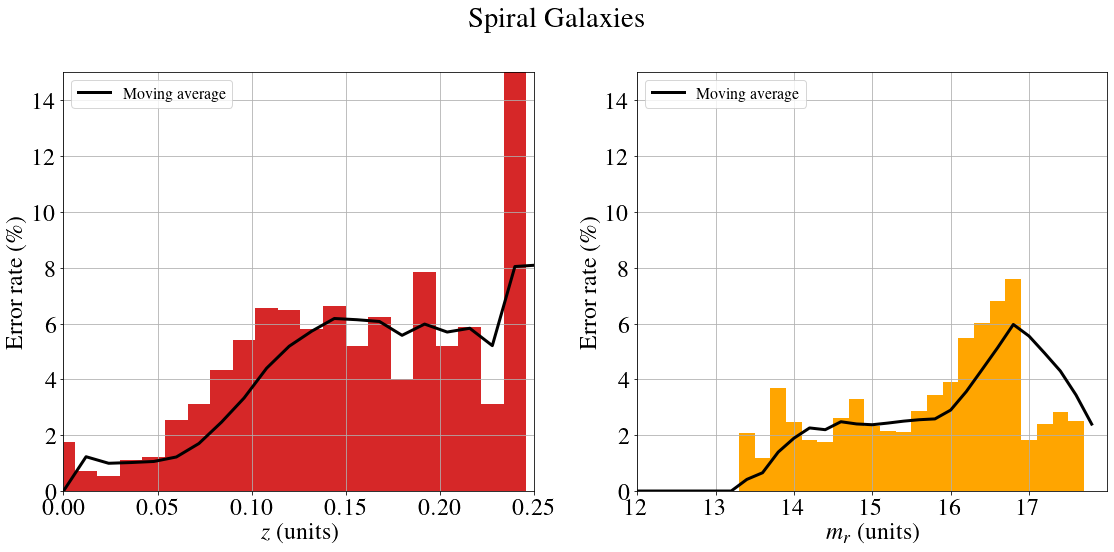

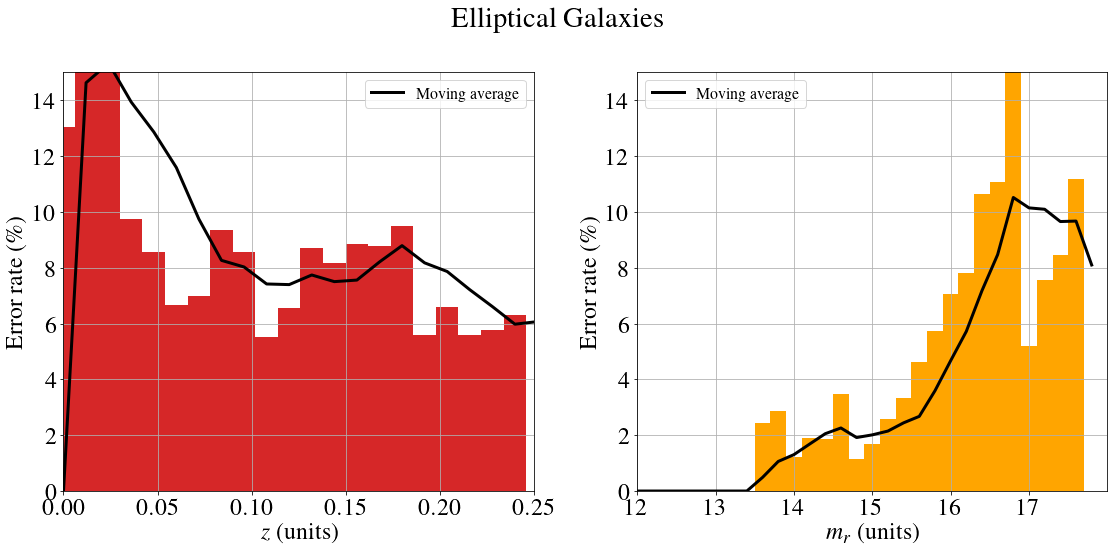

In [159]:
validation_predictions_grayscale_c2 = pd.read_csv("../data/predictions_Cavanagh_validation.csv").sort_values(by="Id")
test_predictions_grayscale_c2 = pd.read_csv("../data/predictions_Cavanagh_test.csv").sort_values(by="Id")
all_predictions_grayscale_C2 = pd.concat([validation_predictions_grayscale_c2, test_predictions_grayscale_c2])

all_predictions_grayscale_C2["PredictedClass"] = np.where(all_predictions_grayscale_C2["Prediction"] <= 0.5, ["Spiral"], ["Elliptical"])
all_predictions_grayscale_C2_with_data = pd.merge(all_predictions_grayscale_C2, redshift_data, on="Id")

incorrect_predictions_grayscale = all_predictions_grayscale_C2_with_data[all_predictions_grayscale_C2_with_data["PredictedClass"] != all_predictions_grayscale_C2_with_data["Class"]].reset_index()

print(len(incorrect_predictions_grayscale))

bins = 30
plot_error_rate_distribution_for_class(
    "Spiral",
    all_predictions_grayscale_C2_with_data[all_predictions_grayscale_C2_with_data["z"] < 0.25],
    incorrect_predictions_grayscale[incorrect_predictions_grayscale["z"] < 0.25],
    bins,
    "distributions_by_galaxies_Spiral_C2.pdf")
plot_error_rate_distribution_for_class(
    "Elliptical",
    all_predictions_grayscale_C2_with_data[all_predictions_grayscale_C2_with_data["z"] < 0.25],
    incorrect_predictions_grayscale[incorrect_predictions_grayscale["z"] < 0.25],
    bins,
    "distributions_by_galaxies_Elliptical_C2.pdf")